In [1]:
from numpy.random import choice
from string import ascii_lowercase
import re
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
con = open('war_and_peace.txt', 'r')       # load data
train = con.read()

In [3]:
train = train.lower()                      # make lowercase
train = re.sub(r'\s+', ' ', train)         # get rid of extra whitespace and newlines

In [4]:
train[5500:5800]

'orrors perpetrated by that antichrist—i really believe he is antichrist—i will have nothing more to do with you and you are no longer my friend, no longer my ‘faithful slave,’ as you call yourself! but how do you do? i see i have frightened you—sit down and tell me all the news.” it was in july, 180'

Transition Probability Matrix:

In [5]:
letters = [i for i in ascii_lowercase]
letters.append('_')                         # _ presents any non-letter character
letters

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '_']

In [6]:
trans_matrix = pd.DataFrame(np.zeros((27, 27), dtype=int), index=letters, columns=letters)
trans_matrix

,a,b,c,d,e,f,g,h,i,j,...,r,s,t,u,v,w,x,y,z,_
a,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
b,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
c,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
d,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
e,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
f,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
g,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
h,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
i,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
j,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Populating Transition Probability Matrix:

In [ ]:
for i in range(len(train) - 1):

    if i % 100000 == 0:
        print('processed first %i characters out of 3210812' % i)

    if train[i] in letters:
        current_letter = train[i]                  # the preceding letter
    else:
        current_letter = '_'                       # if not letter, assign non-letter character # if not letter, assign non-letter character

    if train[i + 1] in letters:
        last_letter = train[i + 1]                  # the succeeding letter
    else:
        last_letter = '_'                           # if not letter, assign non-letter character # if not letter, assign non-letter character

    trans_matrix.loc[current_letter, last_letter] = trans_matrix.loc[current_letter, last_letter] + 1

processed first 0 characters out of 3210812
processed first 100000 characters out of 3210812
processed first 200000 characters out of 3210812
processed first 300000 characters out of 3210812
processed first 400000 characters out of 3210812
processed first 500000 characters out of 3210812
processed first 600000 characters out of 3210812
processed first 700000 characters out of 3210812
processed first 800000 characters out of 3210812
processed first 900000 characters out of 3210812
processed first 1000000 characters out of 3210812
processed first 1100000 characters out of 3210812
processed first 1200000 characters out of 3210812
processed first 1300000 characters out of 3210812
processed first 1400000 characters out of 3210812
processed first 1500000 characters out of 3210812
processed first 1600000 characters out of 3210812
processed first 1700000 characters out of 3210812
processed first 1800000 characters out of 3210812
processed first 1900000 characters out of 3210812
processed first

In [ ]:
trans_matrix = trans_matrix + 1             # allowing log and any combination of letters
trans_matrix

In [ ]:
for i in range(trans_matrix.shape[0]):                   # Normalize by Row_Sum to turn into Probability
    trans_matrix.iloc[i, :] = trans_matrix.iloc[i, :] / trans_matrix.iloc[i, :].sum()

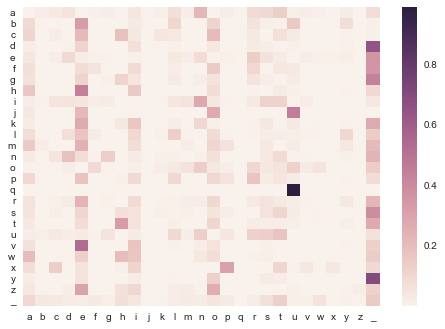

In [13]:
sns.heatmap(trans_matrix)
plt.yticks(rotation=0)
plt.show()

In [14]:
def decode(mapping, coded):                             # function to decode text, given mapping and coded text
    text = []
    for i in coded:
        if i in letters:
            text.append(letters[mapping.index(i)])
        else:
            text.append(letters[mapping.index('_')])
    return ''.join(text)

In [15]:
def encode(mapping, text):                              # function to encode text, given mapping and plain text
    encoded = []
    for i in text:
        if i in letters:
            encoded.append(mapping[letters.index(i)])
        else:
            encoded.append(mapping[letters.index('_')])
    return ''.join(encoded)

In [16]:
def loglike(decoded):                                   # function to calculate Log-like of decoded text
    loglike = 0
    last_letter = '_'
    for i in decoded:
        current_letter = i
        loglike = loglike + np.log(trans_matrix.loc[last_letter, current_letter])
        last_letter = current_letter
    loglike = loglike + np.log(trans_matrix.loc[last_letter, '_'])
    return loglike

In [17]:
np.random.seed(12345)                          # set seed for reproducing

Randomly Scramble to create Encoding Rule (True Mapping, Pretend we dont know):

In [18]:
mapping_true = list(choice(letters, 27, replace=False))
mapping_true

['x',
 'i',
 'k',
 's',
 'm',
 'v',
 'd',
 'n',
 'p',
 't',
 'q',
 'u',
 'a',
 'g',
 'h',
 'l',
 'w',
 'o',
 'r',
 'y',
 '_',
 'z',
 'j',
 'e',
 'b',
 'f',
 'c']

Martin Luther King Jr, Speech:

In [20]:
correct_txt = ('Five score years ago, a great American, in whose symbolic shadow we stand today, signed the Emancipation Proclamation.'
               ' This momentous decree came as a great beacon light of hope to millions of poor slaves who had been seared in the flames'
               ' of withering injustice. It came as a joyous daybreak to end the long night of their captivity').lower()

In [22]:
correct_txt       # decode text, and lets see if Metropolis can decipher this

'five score years ago, a great american, in whose symbolic shadow we stand today, signed the emancipation proclamation. this momentous decree came as a great beacon light of hope to millions of poor slaves who had been seared in the flames of withering injustice. it came as a joyous daybreak to end the long night of their captivity'

In [25]:
encoded = encode(mapping_true, correct_txt)            # Encoded based on True mapping

In [26]:
encoded

'vpzmcrkhomcbmxorcxdhccxcdomxycxamopkxgccpgcjnhrmcrbaihupkcrnxshjcjmcryxgscyhsxbccrpdgmscynmcmaxgkplxyphgclohkuxaxyphgccynprcahamgyh_rcsmkommckxamcxrcxcdomxycimxkhgcupdnychvcnhlmcyhcapuuphgrchvclhhocruxzmrcjnhcnxscimmgcrmxomscpgcynmcvuxamrchvcjpynmopgdcpgt_rypkmccpyckxamcxrcxcthbh_rcsxbiomxqcyhcmgscynmcuhgdcgpdnychvcynmpockxlypzpyb'

In [27]:
mapping0 = list(choice(letters, 27, replace=False))      # set the initial mapping
current_loglik = loglike(decode(mapping0, encoded))

max_loglik = current_loglik                              # best loglikehood so far      
max_decode = decode(mapping0, encoded)                   # best decoded text so far

In [29]:
mapping0                 # very different from True Mapping

['b',
 'q',
 'j',
 'y',
 'g',
 'z',
 'h',
 'm',
 'k',
 's',
 'n',
 'i',
 'w',
 'u',
 'c',
 'v',
 't',
 'r',
 'o',
 'l',
 '_',
 'f',
 'd',
 'p',
 'a',
 'e',
 'x']

Metropolis Begins Here:

In [30]:
while i <= 5000:

    tmp = choice(letters, size=2, replace=False)

    pos1, pos2 = mapping0.index(tmp[0]), mapping0.index(tmp[1])   # randomly swap 2 letters

    mapping_proposed = mapping0[:]                                # create a proposed mapping
    mapping_proposed[pos1], mapping_proposed[pos2] = mapping_proposed[pos2], mapping_proposed[pos1]

    proposed_loglik = loglike(decode(mapping_proposed, encoded))   # loglikehood of proposed mapping

    if (np.random.uniform() < np.exp(proposed_loglik - current_loglik)):   # NRG to decide accept or not
        mapping0 = mapping_proposed
        current_loglik = proposed_loglik

        if current_loglik > max_loglik:
            max_loglik = current_loglik
            max_decode = decode(mapping_proposed, encoded)

            i += 1

        print(i, decode(mapping0, encoded), '\n')

27 pxwhorigshoah_sro_fgoo_ofsh_do_yhsxi_eooxeockgrhoraylgnxiork_jgcochord_ejodgj_aoorxfehjodkhohy_eixt_dxgeotsgin_y_dxgeoodkxroygyhedgurojhishhoi_yho_ro_ofsh_dolh_igeonxfkdogpokgthodgoyxnnxgerogpotggsorn_whrockgok_jolhheorh_shjoxeodkhopn_yhrogpocxdkhsxefoxequrdxihooxdoi_yho_ro_oqgaguroj_alsh_bodgohejodkhongefoexfkdogpodkhxsoi_tdxwxda 

28 puwhorigshoah_sro_fgoo_ofsh_do_yhsui_eooueockgrhoraylgnuiork_jgcochord_ejodgj_aoorufehjodkhohy_eiut_dugeotsgin_y_dugeoodkuroygyhedgxrojhishhoi_yho_ro_ofsh_dolh_igeonufkdogpokgthodgoyunnugerogpotggsorn_whrockgok_jolhheorh_shjoueodkhopn_yhrogpocudkhsuefoueqxrduihooudoi_yho_ro_oqgagxroj_alsh_bodgohejodkhongefoeufkdogpodkhusoi_tduwuda 

29 puwhorigshoah_sro_dgoo_odsh_fo_yhsui_eooueockgrhoraylgnuiork_jgcochorf_ejofgj_aoorudehjofkhohy_eiut_fugeotsgin_y_fugeoofkuroygyhefgxrojhishhoi_yho_ro_odsh_folh_igeonudkfogpokgthofgoyunnugerogpotggsorn_whrockgok_jolhheorh_shjoueofkhopn_yhrogpocufkhsuedoueqxrfuihooufoi_yho_ro_oqgagxroj_alsh_bofgohejofkhongedoeudkfogpofkhu

KeyboardInterrupt: 